# Predict Survival on the Titanic using Machine Learning

### Background: 
The Titanic, once a symbol of human engineering prowess, now lies in silence at the bottom of the North Atlantic. The Titanic's shrinking form serves as a poignant reminder of the impermanence of human achievements against the vast, timeless ocean. This project aims to explore the survival rate of passengers and what make some passengers especially vulenrable than others.

In [1313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [1315]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1317]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_survival = pd.read_csv('survial.csv')

In [1319]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1320]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Data Cleaning and Preprocessing

In [1322]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1326]:
df_train = df_train[df_train['Age'] >= 1]
df_train = df_train.drop(columns={'Cabin','Ticket'})

In [1328]:
df_train['Age'] = df_train['Age'].astype(int)

## Exploratory Data Analysis

### Some Notes:
##### Parch: Number of parents / children aboard the Titanic
##### SubSp: Number of siblings / spouses aboard the Titanic
##### pclass: Ticket class
##### embarked:	Port of Embarkation

#### Some questions we are interested in exploring:
1. What do we know about the gender distribution of the passengers?
2. Could it be associated with age? Maybe adults are more likely to survive?
3. Maybe higher classes have more opportunities to survive. They could have the privilege to be saved.
4. The cabin may tell us information. Maybe the further away from the broken parts, the more likely passengers are to survive.
5. The number of siblings may also affect it. The more siblings a parent has, the less likely these people can be saved since they need to take care of more people.

### 1. What do we know about the Sex distribution?

In [1334]:
T1_sex = df_train.groupby('Sex')['PassengerId'].count()
T1_sex

Sex
female    259
male      448
Name: PassengerId, dtype: int64

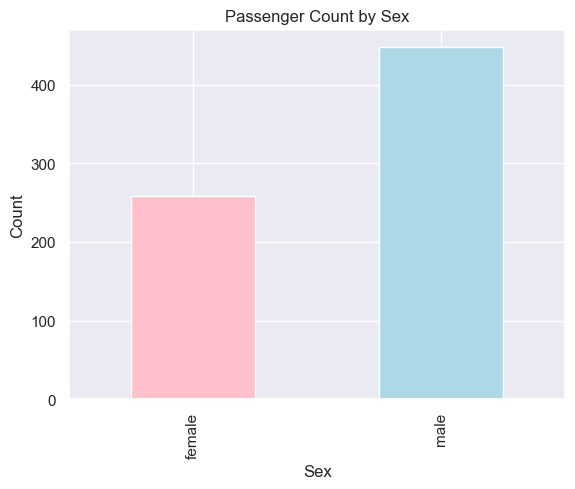

In [1336]:
T1_sex.plot(kind='bar', color=['pink', 'lightblue'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Passenger Count by Sex')
plt.show()

In [1338]:
men_survived = df_train[df_train['Sex'] == 'male']['Survived']
women_survived = df_train[df_train['Sex'] == 'female']['Survived']
men_survived_p = sum(men_survived)/len(men_survived)
women_survived_p = sum(women_survived)/len(men_survived)
print("% of men who survived:", men_survived_p)
print("% of women who survived:", women_survived_p)

% of men who survived: 0.19642857142857142
% of women who survived: 0.43526785714285715


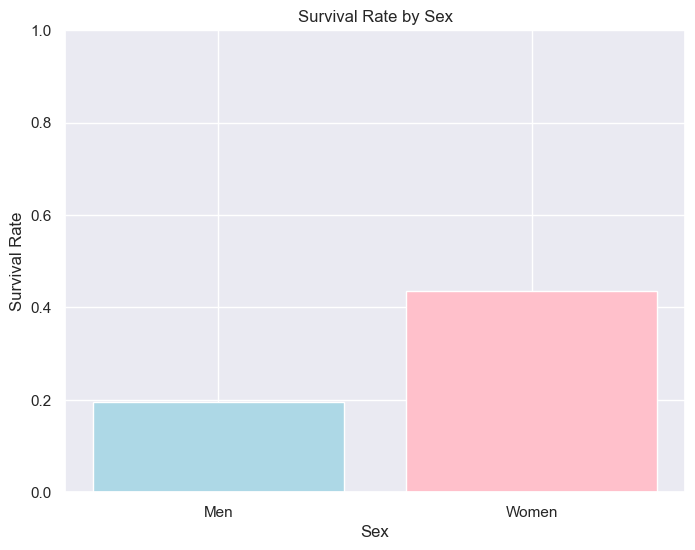

In [1340]:
survival_rates = {
    'Men': men_survived_p,
    'Women': women_survived_p
}

# Create DataFrame
survival_df = pd.DataFrame(list(survival_rates.items()), columns=['Sex', 'Survival Rate'])

# Plot
plt.figure(figsize=(8, 6))
plt.bar(survival_df['Sex'], survival_df['Survival Rate'], color=['lightblue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.ylim(0, 1)
plt.show()

The discrepancy in survival rates displayed in the plot suggests that sex could be a significant factor in predicting survival outcomes. Women have almost twice the survival rate of men, likely due to many male passengers letting female passengers to board lifeboats first, as depicted in the movie "Titanic."

### 2. Could it be associated with age? Maybe adults are more likely to survive?

We know the min is 1 and max is 80 and we can use the data range to divide age groups: 
[1-10,
11-20,
21-30,
31-40,
41-50,
51-60,
61-70,
71-80]

In [1345]:
T1_age = df_train.groupby('Age')['PassengerId'].count()
T1_age

Age
1      7
2     10
3      6
4     10
5      4
      ..
66     1
70     3
71     2
74     1
80     1
Name: PassengerId, Length: 70, dtype: int64

In [1347]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)

In [1357]:
age_group_survival = df_train.groupby('AgeGroup', observed=True)['Survived'].mean()

# Convert the result to a DataFrame for easier visualization
age_group_survival_df = age_group_survival.reset_index()
age_group_survival_df.columns = ['AgeGroup', 'SurvivalRate']

# Display the DataFrame
print(age_group_survival_df)

  AgeGroup  SurvivalRate
0     1-10      0.563636
1    11-20      0.401961
2    21-30      0.350000
3    31-40      0.437126
4    41-50      0.382022
5    51-60      0.416667
6    61-70      0.315789
7    71-80      0.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


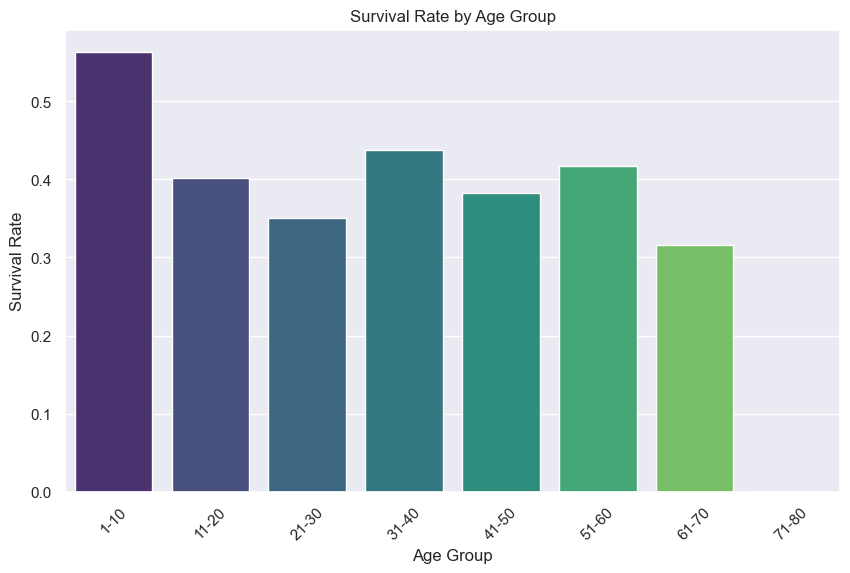

In [1363]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='SurvivalRate', data=age_group_survival_df, palette='viridis')

# Add titles and labels
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Show the plot
plt.xticks(rotation=45)
plt.show()

/var/folders/jv/c17q5np950ncp50mdxmddd7r0000gn/T/ipykernel_16490/1029890526.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df_train.groupby(['AgeGroup', 'Survived']).size().unstack()


<Figure size 1400x600 with 0 Axes>

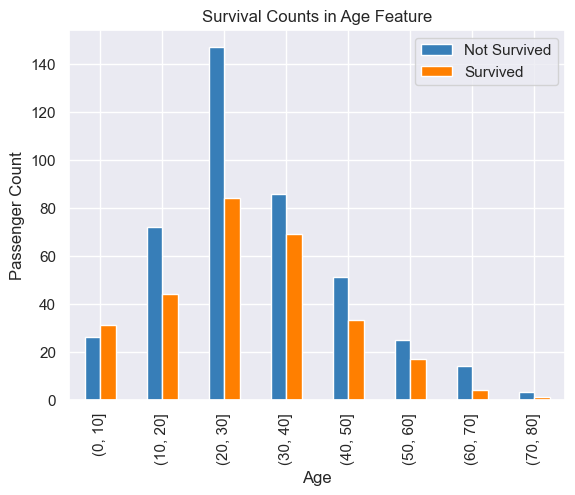

In [1148]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins)

# Count the number of survived and not survived passengers per age group
age_group_survival = df_train.groupby(['AgeGroup', 'Survived']).size().unstack()

# Plot the data
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")

age_group_survival.plot(kind='bar', stacked=False, color=['#377eb8', '#ff7f00'])
plt.title('Survival Counts in Age Feature')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

Age could be an interesting feature to explore, as the survival rate varies distinctly across different age groups.

### 3. Maybe higher classes have more opportunities to survive. They could have the privilege to be saved.

In [1152]:
T1_class = df_train.groupby('Pclass')['PassengerId'].count()
T1_class

Pclass
1    185
2    170
3    352
Name: PassengerId, dtype: int64

In [1154]:
Grouped_T1 = df_train.groupby('Pclass')['Survived'].mean()
class_group_survival_df = Grouped_T1.reset_index()
class_group_survival_df.columns = ['ClassGroup', 'SurvivalRate']
class_group_survival_df

,ClassGroup,SurvivalRate
0,1,0.654054
1,2,0.470588
2,3,0.232955


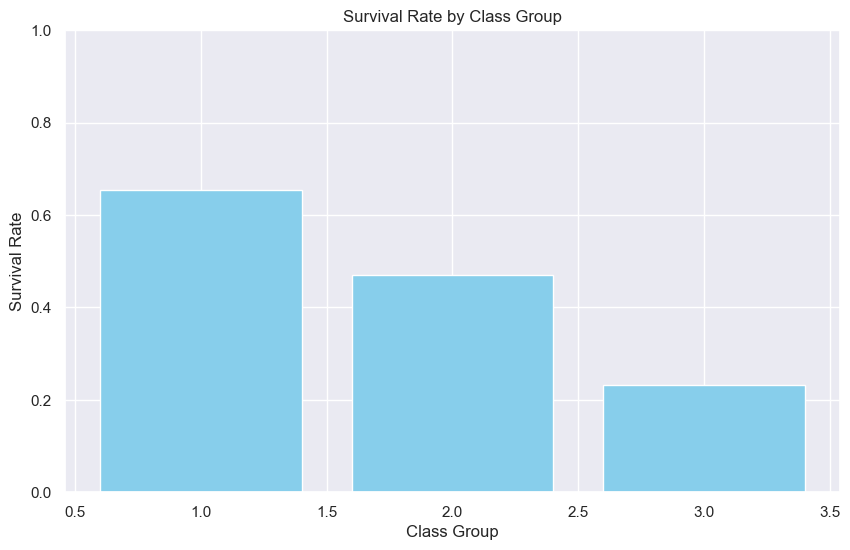

In [1156]:
plt.figure(figsize=(10, 6))
plt.bar(class_group_survival_df['ClassGroup'], class_group_survival_df['SurvivalRate'], color='skyblue')
plt.xlabel('Class Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class Group')
plt.ylim(0, 1)
plt.show()

It could be an interesting feature to be included as the plot is decreasing when the class level decreases.

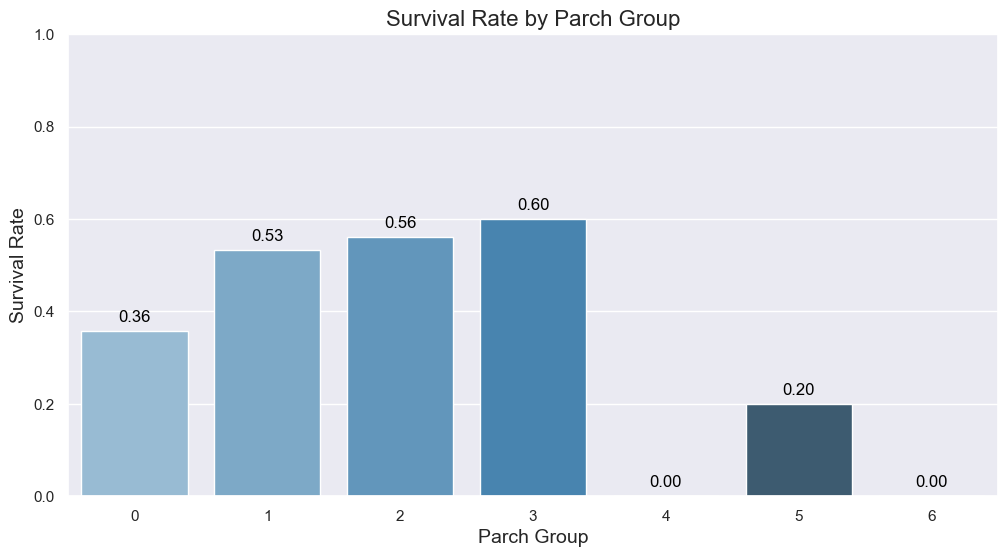

In [1159]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Parch', y='SurvivalRate', data=PC_counts_df, palette='Blues_d')

plt.title('Survival Rate by Parch Group', fontsize=16)
plt.xlabel('Parch Group', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.ylim(0, 1)

for index, row in PC_counts_df.iterrows():
    plt.text(row.name, row.SurvivalRate + 0.02, f'{row.SurvivalRate:.2f}', color='black', ha="center")

plt.show()

This may not be a useful feature to use as survival rates for each group are relatively close to each other. 

### Feature Engineering and Modelling:

In [1164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [1166]:
df_train['Sex_encoded'] = df_train['Sex'].replace({'female': 1, 'male': 0})
df_test['Sex_encoded'] = df_test['Sex'].replace({'female': 1, 'male': 0})

In [1168]:
mediana = df_train['Fare'].dropna().median()
medianb = df_test['Fare'].dropna().median()
medianc = df_test['Sex_encoded'].dropna().median()
mediand = df_train['Age'].dropna().median()
mediane = df_test['Age'].dropna().median()

In [1170]:
df_train['Fare'].fillna(mediana, inplace=True)
df_test['Fare'].fillna(medianb, inplace=True)
df_test['Sex_encoded'].fillna(medianc, inplace=True)
df_test['Age'].fillna(mediand, inplace=True)
df_test['Age'].fillna(mediane, inplace=True)

In [1172]:
df_train = pd.merge(df_train, df_survival, on='PassengerId', how='left').drop(columns='Survived_y')
df_test = pd.merge(df_test, df_survival, on='PassengerId', how='left')

In [1177]:
def preprocess_data(df):
    median_age = df['Age'].median()
    df['Age'].fillna(median_age, inplace=True)
    median_fare = df['Fare'].median()
    df['Fare'].fillna(median_fare, inplace=True)
    most_frequent_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(most_frequent_embarked, inplace=True)
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
    labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'AgeGroup'])

    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)
    return df

df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)
df_train.drop(columns=['Name'], inplace=True)
df_test.drop(columns=['Name'], inplace=True)

missing_cols = set(df_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0


X = df_train.drop(columns=['Survived_x'])
y = df_train['Survived_x']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        92
           1       0.71      0.74      0.73        50

    accuracy                           0.80       142
   macro avg       0.78      0.79      0.79       142
weighted avg       0.80      0.80      0.80       142

[[77 15]
 [13 37]]
           Feature  Importance
5             Fare    0.166613
0      PassengerId    0.150238
2              Age    0.124332
7       Sex_female    0.087409
6      Sex_encoded    0.083209
1           Pclass    0.078613
8         Sex_male    0.075499
20           Title    0.068992
3            SibSp    0.035231
4            Parch    0.027488
9       Embarked_C    0.016451
14  AgeGroup_21-30    0.014674
15  AgeGroup_31-40    0.013065
11      Embarked_S    0.012991
16  AgeGroup_41-50    0.010572
12   AgeGroup_1-10    0.009396
13  AgeGroup_11-20    0.007524
18  AgeGroup_61-70    0.006437
17  AgeGroup_51-60    0.005990
10      Embarked_Q 

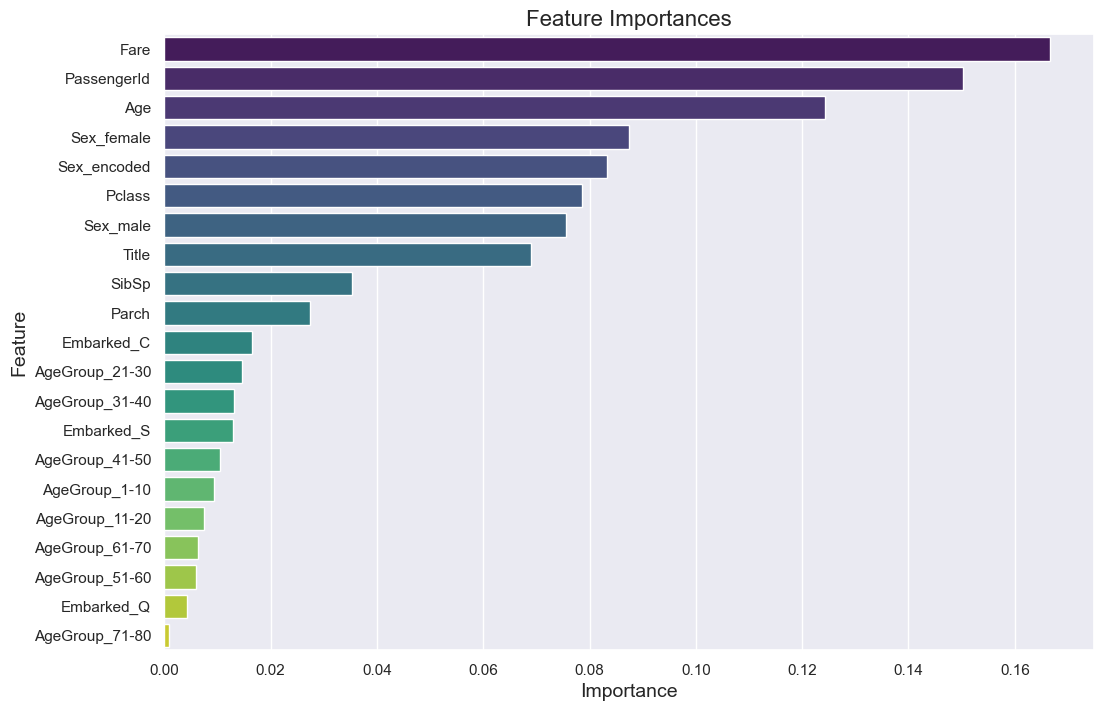

In [1179]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')

# Add titles and labels
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()

### Model Evaluation

In [1181]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        92
           1       0.71      0.74      0.73        50

    accuracy                           0.80       142
   macro avg       0.78      0.79      0.79       142
weighted avg       0.80      0.80      0.80       142

[[77 15]
 [13 37]]
           Feature  Importance
5             Fare    0.166613
0      PassengerId    0.150238
2              Age    0.124332
7       Sex_female    0.087409
6      Sex_encoded    0.083209
1           Pclass    0.078613
8         Sex_male    0.075499
20           Title    0.068992
3            SibSp    0.035231
4            Parch    0.027488
9       Embarked_C    0.016451
14  AgeGroup_21-30    0.014674
15  AgeGroup_31-40    0.013065
11      Embarked_S    0.012991
16  AgeGroup_41-50    0.010572
12   AgeGroup_1-10    0.009396
13  AgeGroup_11-20    0.007524
18  AgeGroup_61-70    0.006437
17  AgeGroup_51-60    0.005990
10      Embarked_Q 

In [1017]:
test_survival = df_test['Survived']

In [1019]:
df_test.drop(columns = {'Cabin', 'Survived','Survived_x','Ticket'}, inplace =True)
test_predictions = model.predict(df_test)

In [1027]:
test_accuracy = accuracy_score(test_survival, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.82


In [ ]:
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': test_predictions})
output.to_csv('test_predictions.csv', index=False)